**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.quality.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [6]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

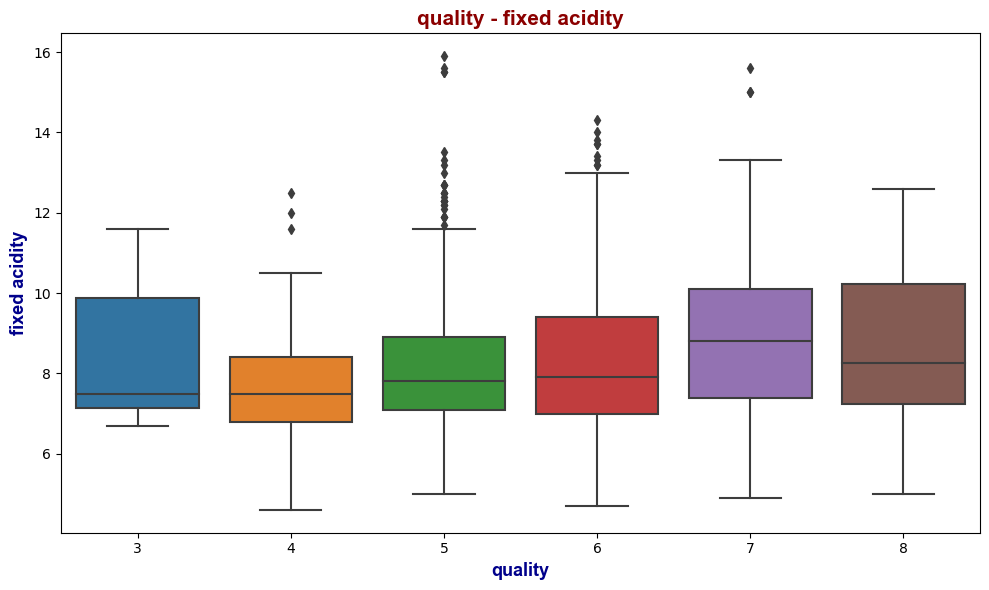

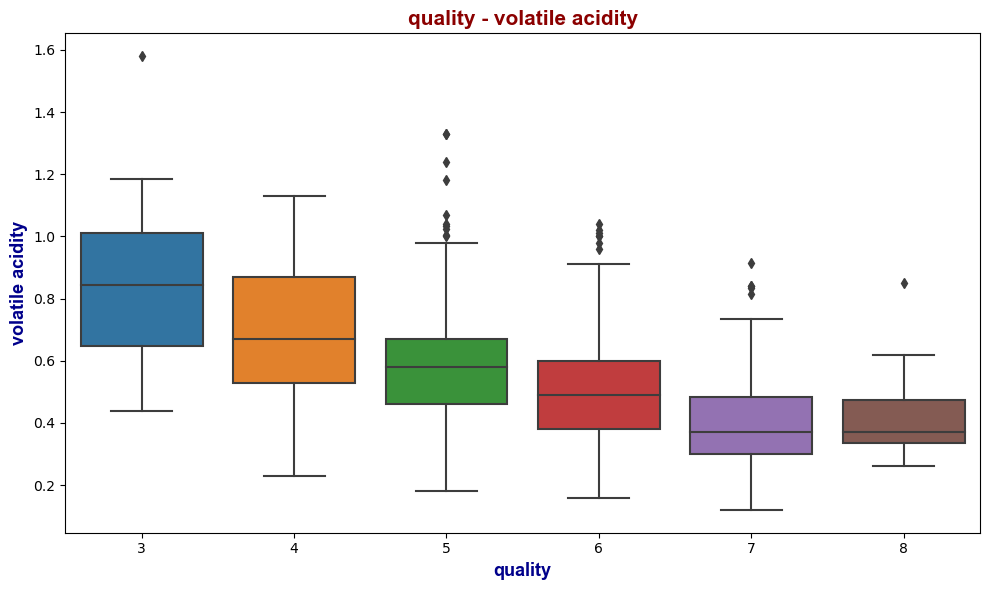

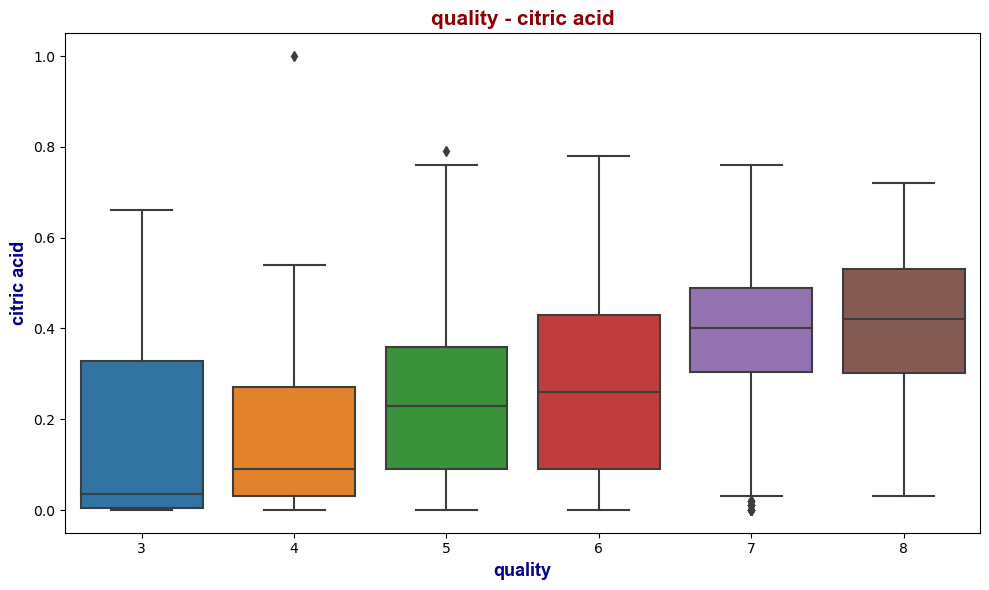

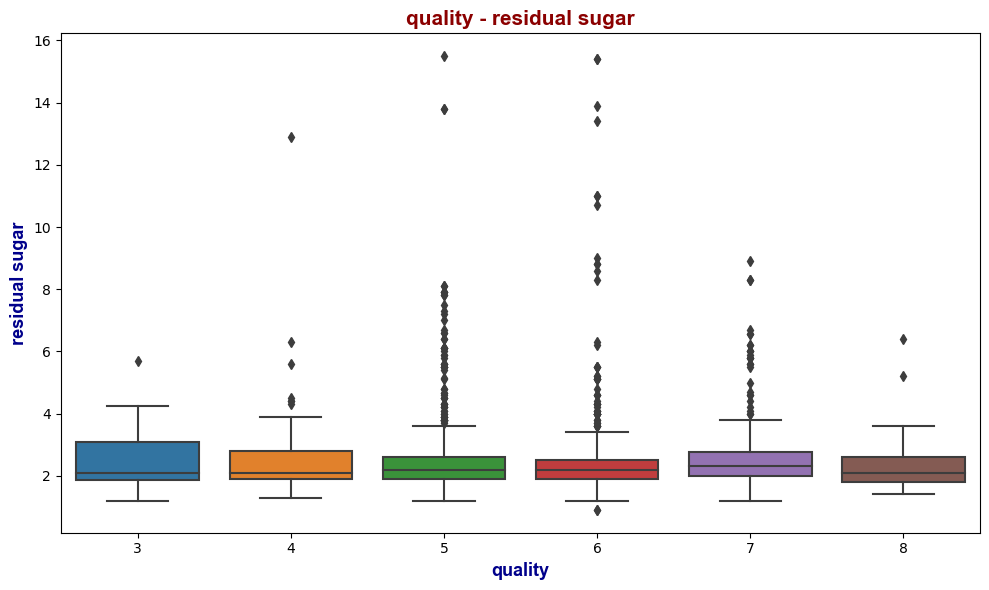

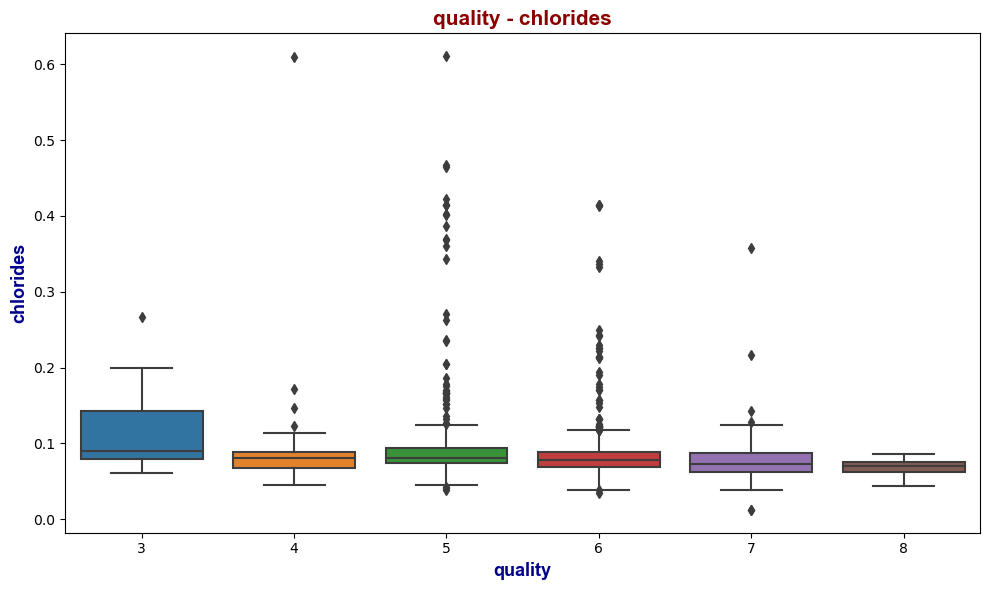

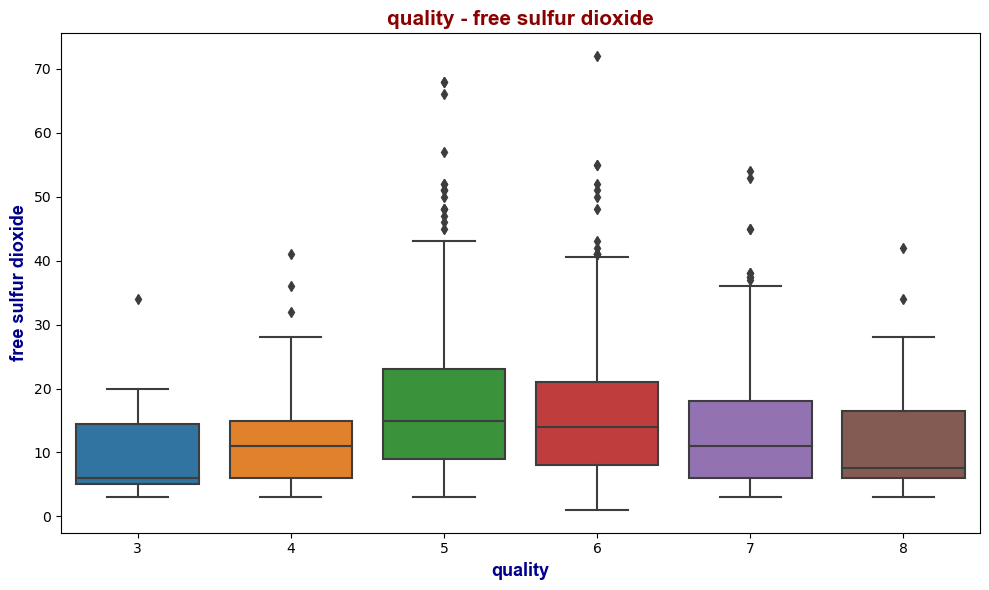

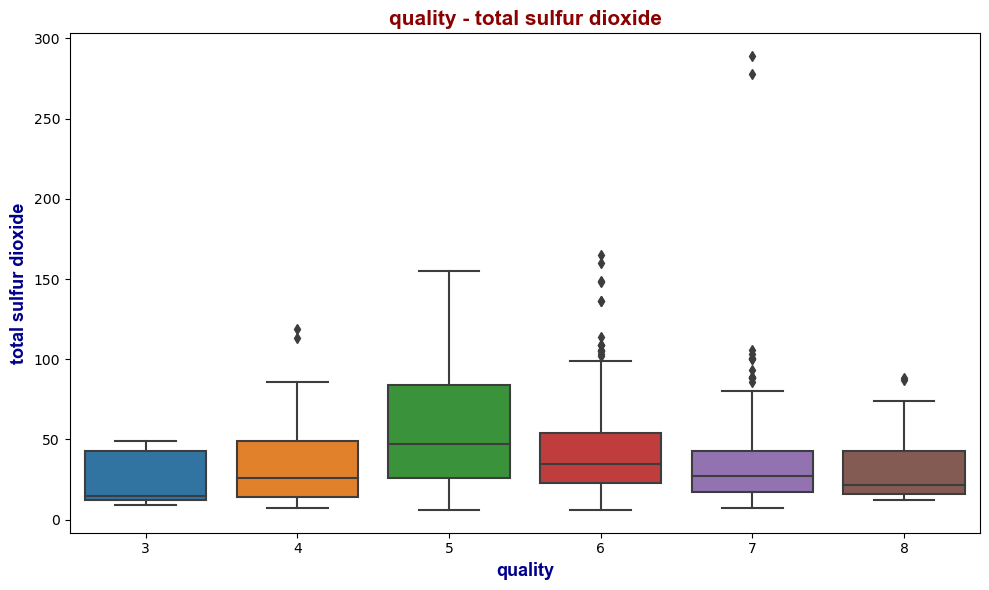

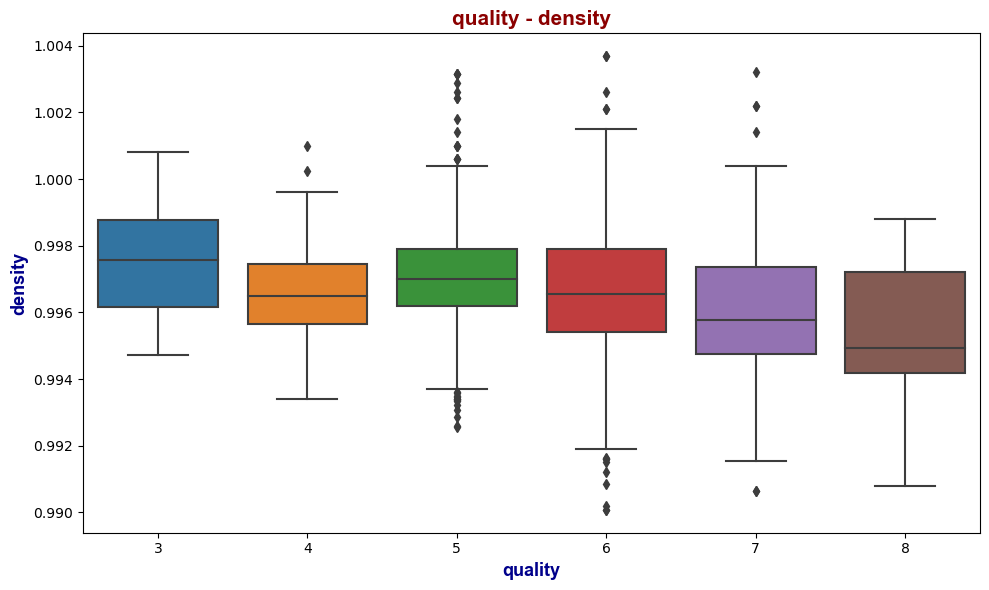

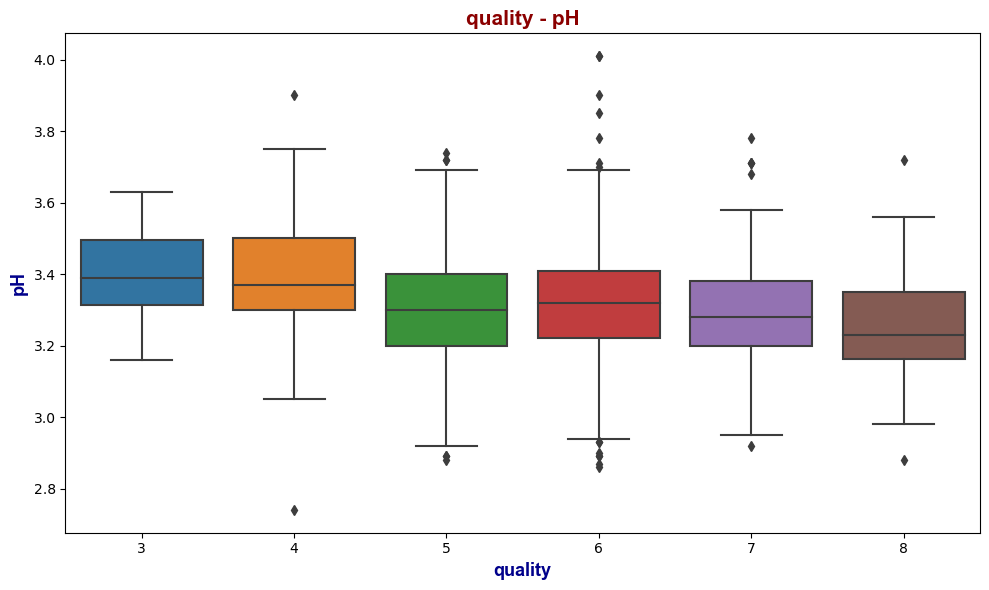

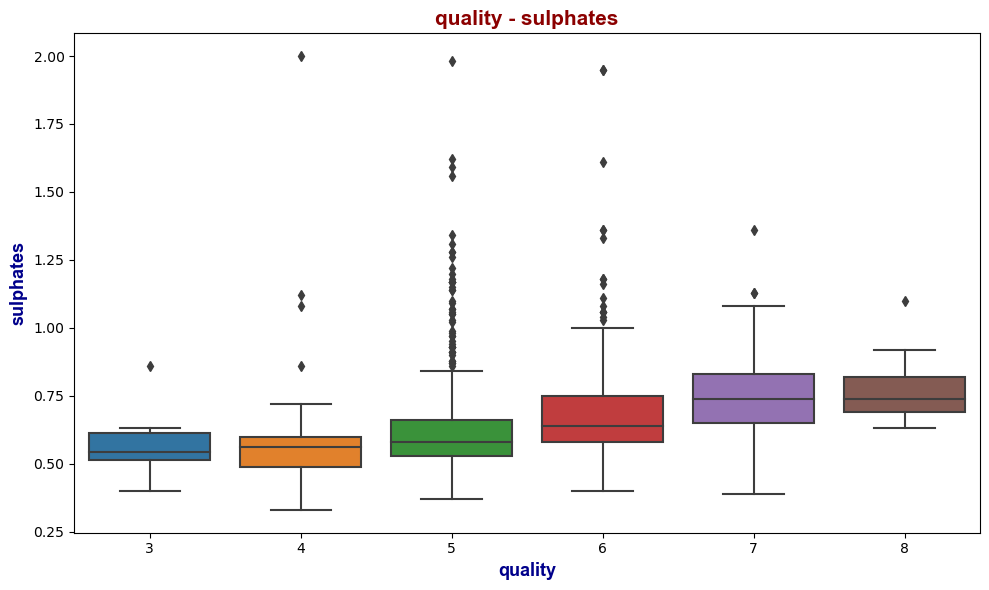

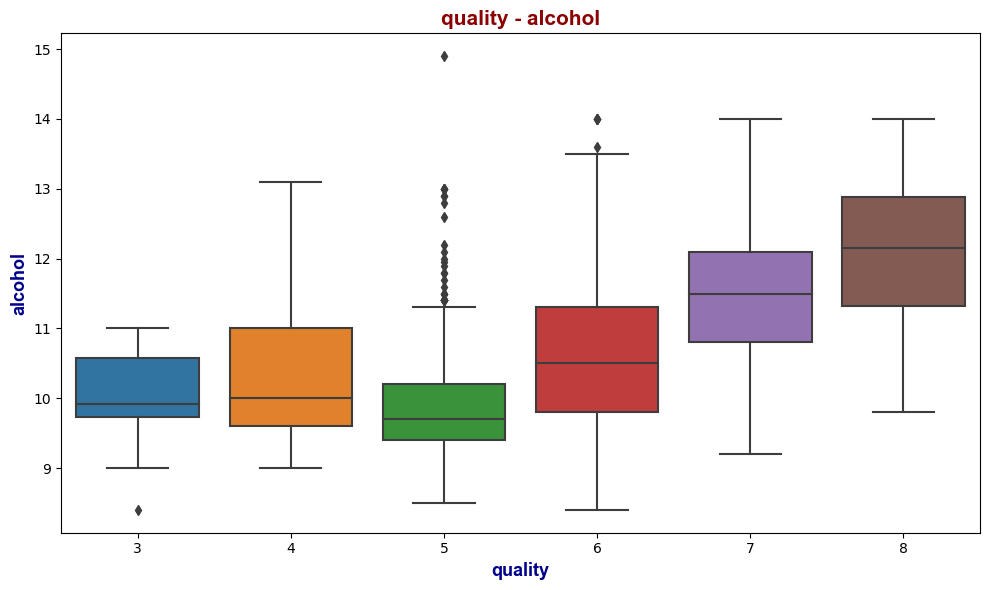

In [7]:
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i in df.columns[:-1]:
    plt.figure(figsize = (10,6))
    sns.boxplot( x="quality", y = i, data = df)
    
    plt.title("quality - " + i, fontdict = title_font)
    plt.xlabel("quality", fontdict = axis_font)
    plt.ylabel(i, fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

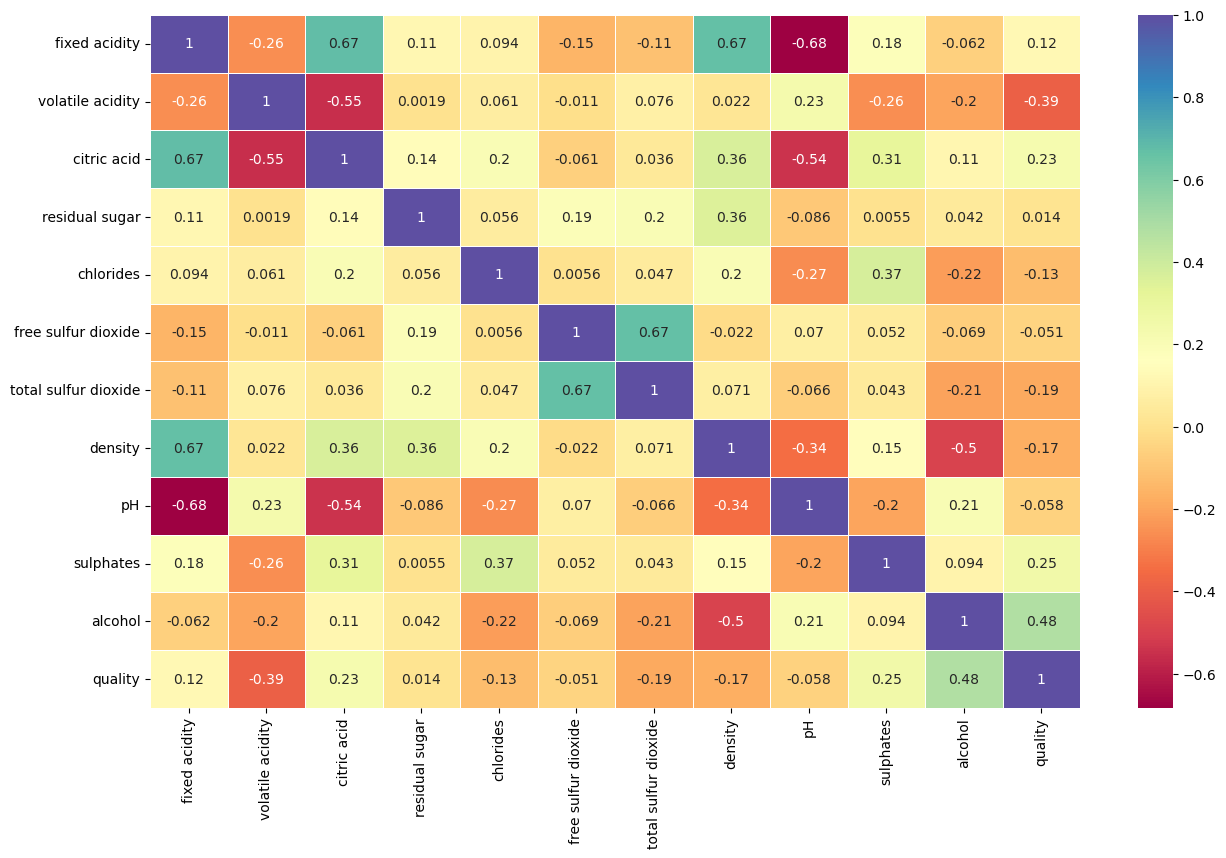

In [8]:
plt.figure(figsize=(15,9))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot =True, linewidth=0.5, cmap="Spectral")
plt.show()

**Preparation for Model**

In [9]:
df.drop(["residual sugar", "free sulfur dioxide", "pH"], axis=1, inplace = True)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [11]:
bins =(2, 6.5, 8)
group_names = ["bad", "good"]
df["quality"] = pd.cut(df["quality"], bins = bins, labels = group_names)
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,bad
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,bad
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,bad
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,bad
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,bad


<Axes: xlabel='quality', ylabel='count'>

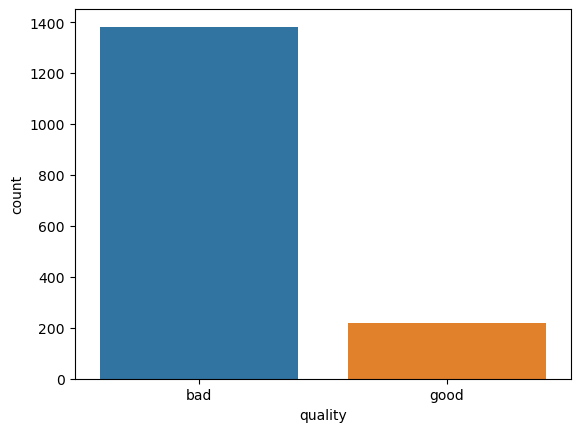

In [15]:
sns.countplot(x="quality", data=df)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
new_quality = LabelEncoder()

In [18]:
df["quality"] = new_quality.fit_transform(df["quality"])
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,0
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,0
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,0
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,0


In [19]:
df["quality"].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

In [20]:
X = df.drop(["quality"], axis=1)
Y = df["quality"]

In [21]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.25, random_state=42)

**Scaling**

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**SVC Modelling**

In [24]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, Y_train)

SVC()

In [26]:
Y_pred = svc_model.predict(X_test)

In [27]:
cv_scores = cross_val_score(estimator = svc_model, X =X_train, y = Y_train, cv =100)
cv_scores.mean()

0.8841666666666668

Text(0.5, 23.52222222222222, 'Predicted Label')

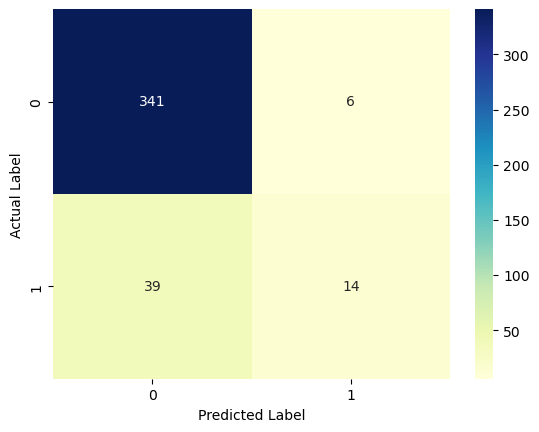

In [30]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = "YlGnBu", fmt ="d")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [32]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       347
           1       0.70      0.26      0.38        53

    accuracy                           0.89       400
   macro avg       0.80      0.62      0.66       400
weighted avg       0.87      0.89      0.86       400



**Hyperparameter Optimization**

In [33]:
svc_model2= SVC()

In [34]:
param_grid = {'C': [0.1, 1, 10],
              'gamma' : [1,0.1,0.01],
              'kernel' : ['poly', 'rbf']}

In [35]:
svc_cv_model = GridSearchCV(estimator = svc_model2, param_grid = param_grid, cv =10)

In [36]:
svc_cv_model.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['poly', 'rbf']})

In [38]:
svc_cv_model.best_params_

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [39]:
svc_tuned = SVC(C=1, gamma =1, kernel = "rbf")

In [40]:
svc_tuned.fit(X_train, Y_train)

SVC(C=1, gamma=1)

In [41]:
Y_pred = svc_tuned.predict(X_test)

In [45]:
cv_scores = cross_val_score(estimator = svc_tuned, X =X_train, y = Y_train, cv =10)
cv_scores.mean()

0.8907703081232492

Text(0.5, 23.52222222222222, 'Predicted Label')

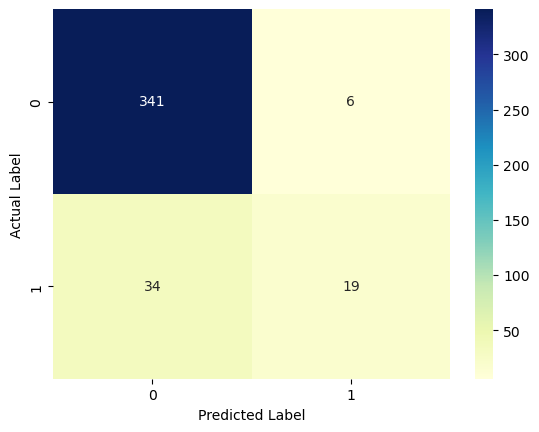

In [46]:
cnf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(cnf_matrix, annot = True, cmap = "YlGnBu", fmt ="d")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [47]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       347
           1       0.76      0.36      0.49        53

    accuracy                           0.90       400
   macro avg       0.83      0.67      0.72       400
weighted avg       0.89      0.90      0.88       400

